In [1]:
%matplotlib inline

In [2]:
import kagglehub

path = kagglehub.dataset_download("sootersaalu/amazon-top-50-bestselling-books-2009-2019")

100%|██████████| 14.5k/14.5k [00:00<00:00, 18.0MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-top-50-bestselling-books-2009-2019


In [3]:
import os

os.listdir(path)

['bestsellers with categories.csv']

Прочитайте csv файл (використовуйте функцію read_csv) \
Виведіть перші п'ять рядків (використовується функція head)

In [4]:
import pandas as pd
csv_path = os.path.join(path, "bestsellers with categories.csv")
df = pd.read_csv(csv_path)

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [5]:
df.shape

(550, 7)

In [8]:
df["Name"].nunique()

351

**Відповідь:** Датасет зберігає дані про 351 книгy

In [10]:
df["Name"].value_counts()[df["Name"].value_counts() > 1]

,count
Name,
"Publication Manual of the American Psychological Association, 6th Edition",10
StrengthsFinder 2.0,9
"Oh, the Places You'll Go!",8
The Very Hungry Caterpillar,7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change,7
...,...
Hillbilly Elegy: A Memoir of a Family and Culture in Crisis,2
"Girl, Wash Your Face: Stop Believing the Lies About Who You Are So You Can Become Who You Were Meant to Be",2
Three Cups of Tea: One Man's Mission to Promote Peace - One School at a Time,2


Перейменування колонок

In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [ ]:
df.isna().sum()

,0
name,0
author,0
user_rating,0
reviews,0
price,0
year,0
genre,0


**Відповідь:** Ні, у жодній змінній немає пропусків.

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [ ]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

**Відповідь:** Унікальні жанри Fiction та Non Fiction.

Побудуйте діаграму (використовуйте kind='hist') \
Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

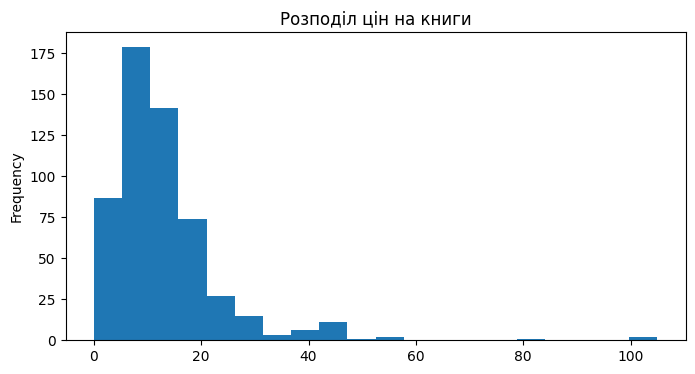

In [ ]:
df['price'].plot(kind='hist', bins=20, figsize=(8,4), title='Розподіл цін на книги');

In [ ]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


**Відповідь:** Максимальна ціна - 105

**Відповідь:** Мінімальна ціна - 0

**Відповідь:** Середня ціна - 13.1

**Відповідь:** Медіанна ціна - 11

In [ ]:
max_rating = df['user_rating'].max()
max_rating

4.9

Який рейтинг у датасеті найвищий? **Відповідь:** 4.9

In [ ]:
books_with_max_rating = df[df['user_rating'] == max_rating]
len(books_with_max_rating)

52

Скільки книг мають такий рейтинг? **Відповідь:** 52

In [ ]:
max_reviews = df['reviews'].idxmax()
df.loc[max_reviews]

,534
name,Where the Crawdads Sing
author,Delia Owens
user_rating,4.8
reviews,87841
price,15
year,2019
genre,Fiction


Яка книга має найбільше відгуків? **Відповідь:** Where the Crawdads Sing

In [ ]:
df_2015 = df[df["year"] == 2015]
max_price_book = df_2015[df_2015["price"] == df_2015["price"].max()]
max_price_book

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? **Відповідь:** Publication Manual of the American Psychological Association, 6th Edition

In [ ]:
fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
len(fiction_2010)

20

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? **Відповідь:** 20

In [ ]:
books_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
len(books_2010_2011)

1

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? **Відповідь:** 1

Книги 2015 року дешевші за 8$, відсортовані за зростанням ціни

In [ ]:
cheap_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price')
cheap_2015

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction


In [ ]:
last_book = cheap_2015.iloc[-1]
last_book

,253
name,Old School (Diary of a Wimpy Kid #10)
author,Jeff Kinney
user_rating,4.8
reviews,6169
price,7
year,2015
genre,Fiction


Яка книга остання у відсортованому списку? **Відповідь:** Old School (Diary of a Wimpy Kid #10)

Мін/макс ціна для кожного жанру

In [ ]:
genre_price_stats = df.groupby('genre')['price'].agg(['min', 'max'])
genre_price_stats

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


**Відповідь:** Максимальна ціна для жанру Fiction: 82 \
**Відповідь:** Мінімальна ціна для жанру Fiction: 0 \
**Відповідь:** Максимальна ціна для жанру Non Fiction: 105 \
**Відповідь:** Мінімальна ціна для жанру Non Fiction: 0

Кількість книг для кожного автора

In [ ]:
author_book_counts = df.groupby('author')['name'].agg('count').to_frame(name='book_count')
author_book_counts.head()

,book_count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1


In [ ]:
author_book_counts.shape

(248, 1)

Якої розмірності вийшла таблиця? **Відповідь:** 248х1 (248 авторів, 1 стовпець кількість їхніх книг)


In [ ]:
top_author = author_book_counts['book_count'].idxmax()
top_author_count = author_book_counts['book_count'].max()
top_author, top_author_count

('Jeff Kinney', 12)

Який автор має найбільше книг? **Відповідь:** Jeff Kinney \
Скільки книг цього автора? **Відповідь:** 12

Середній рейтинг для кожного автора

In [ ]:
author_avg_rating = df.groupby('author')['user_rating'].agg('mean').to_frame(name='avg_rating')
author_avg_rating.head()

,avg_rating
author,
Abraham Verghese,4.6
Adam Gasiewski,4.4
Adam Mansbach,4.8
Adir Levy,4.8
Admiral William H. McRaven,4.7


In [ ]:
min_rating_author = author_avg_rating['avg_rating'].idxmin()
min_rating_value = author_avg_rating['avg_rating'].min()
min_rating_author, min_rating_value

('Donna Tartt', 3.9)

У якого автора середній рейтинг мінімальний? **Відповідь:** Donna Tartt \
Який у цього автора середній рейтинг? **Відповідь:** 3.9

З’єднання двох таблиць

In [ ]:
author_stats = pd.concat([author_book_counts, author_avg_rating], axis=1)
author_stats.head()

,book_count,avg_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


Сортування за зростанням

In [ ]:
author_stats_sorted = author_stats.sort_values(['book_count', 'avg_rating'], ascending=[True, True])
author_stats_sorted.head()

,book_count,avg_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2


In [ ]:
first_author = author_stats_sorted.index[0]
first_author

'Muriel Barbery'

Який автор перший у списку? **Відповідь:** Muriel Barbery

[Text(0.5, 1.0, 'Тренд популярності жанрів по роках'),
 Text(0.5, 0, 'Рік'),
 Text(0, 0.5, 'Кількість книг у топ-50')]

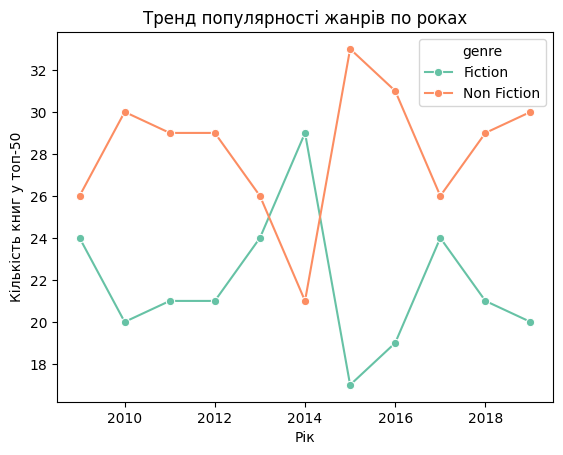

In [ ]:
import seaborn as sns

genre_trend = df.groupby(["year", "genre"]).size().reset_index(name="count")

sns.lineplot(
    data=genre_trend,
    x="year",
    y="count",
    hue="genre",
    marker="o",
    palette="Set2"
).set(
    title="Тренд популярності жанрів по роках",
    xlabel="Рік",
    ylabel="Кількість книг у топ-50"
)

In [ ]:
import matplotlib.pyplot as plt


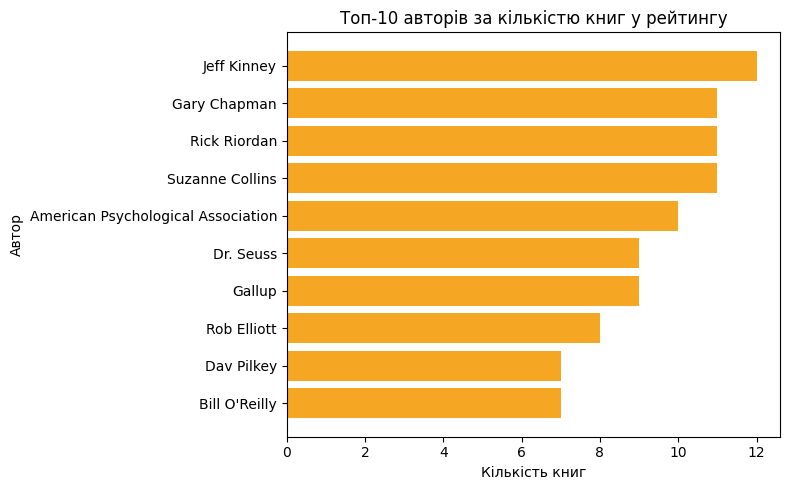

In [ ]:
top10_authors = author_book_counts.sort_values('book_count', ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(
    top10_authors.index,
    top10_authors['book_count'],
    color="#F5A623"
)
plt.gca().invert_yaxis()
plt.title("Топ-10 авторів за кількістю книг у рейтингу")
plt.xlabel("Кількість книг")
plt.ylabel("Автор")
plt.tight_layout()
plt.show()


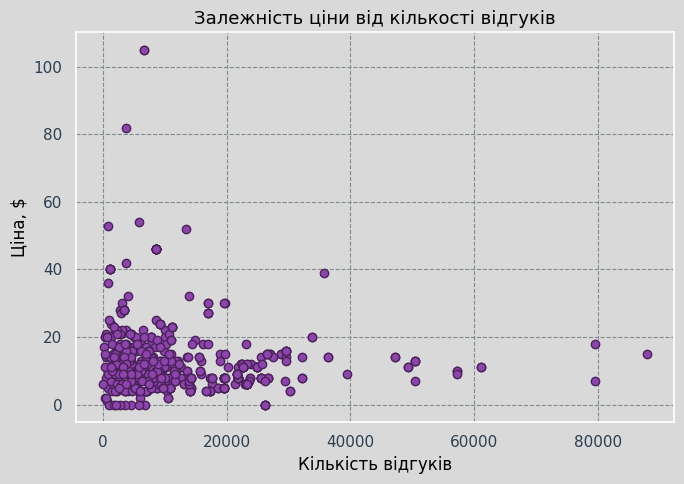

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

plt.gca().set_facecolor("#d9d9d9")
plt.gcf().set_facecolor("#d9d9d9")

plt.scatter(
    df["reviews"],
    df["price"],
    color="#8e44ad",
    edgecolors="#4a235a"
)

plt.grid(
    linestyle="--",
    linewidth=0.8,
    color="#7f8c8d",
)

plt.title("Залежність ціни від кількості відгуків", color="black", fontsize=13)
plt.xlabel("Кількість відгуків", color="black")
plt.ylabel("Ціна, $", color="black")

plt.tick_params(colors="#2c3e50")

plt.tight_layout()
plt.show()


[Text(0.5, 1.0, 'Середній рейтинг книг по роках'),
 Text(0.5, 0, 'Рік'),
 Text(0, 0.5, 'Середній рейтинг')]

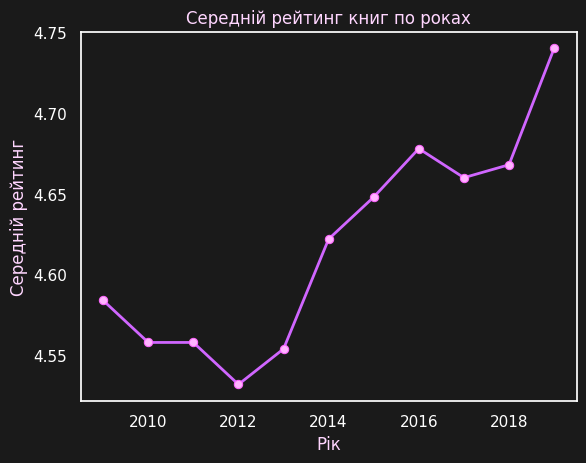

In [ ]:
import seaborn as sns

sns.set_theme(
    style="dark",
    rc={
        "axes.facecolor": "#1a1a1a",
        "figure.facecolor": "#1a1a1a",
        "grid.color": "#b38bff",
        "text.color": "#ffd6ff",
        "axes.labelcolor": "#ffd6ff",
        "xtick.color": "#ffffff",
        "ytick.color": "#ffffff",
    }
)

rating_year = df.groupby("year")["user_rating"].mean().reset_index()

sns.lineplot(
    data=rating_year,
    x="year",
    y="user_rating",
    marker="o",
    color="#d066ff",
    markerfacecolor="#ffb3ff",
    markeredgecolor="#ff66ff",
    linewidth=2
).set(
    title="Середній рейтинг книг по роках",
    xlabel="Рік",
    ylabel="Середній рейтинг"
)
